___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [ ]:
X_train[5]

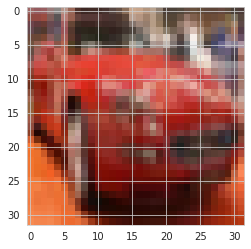

In [ ]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
pd.Series(y_train.flatten()).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#trainden donen arraylari burada indexleyerek hangisi oldugunu bulacagiz

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
classes[y_train[1][0]]

'truck'

In [ ]:
y_train[2222]

array([6], dtype=uint8)

In [ ]:
classes[y_train[2222][0]]

'frog'

In [ ]:
y_train[5555]

array([5], dtype=uint8)

In [ ]:
classes[y_train[5555][0]]

'dog'

In [ ]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

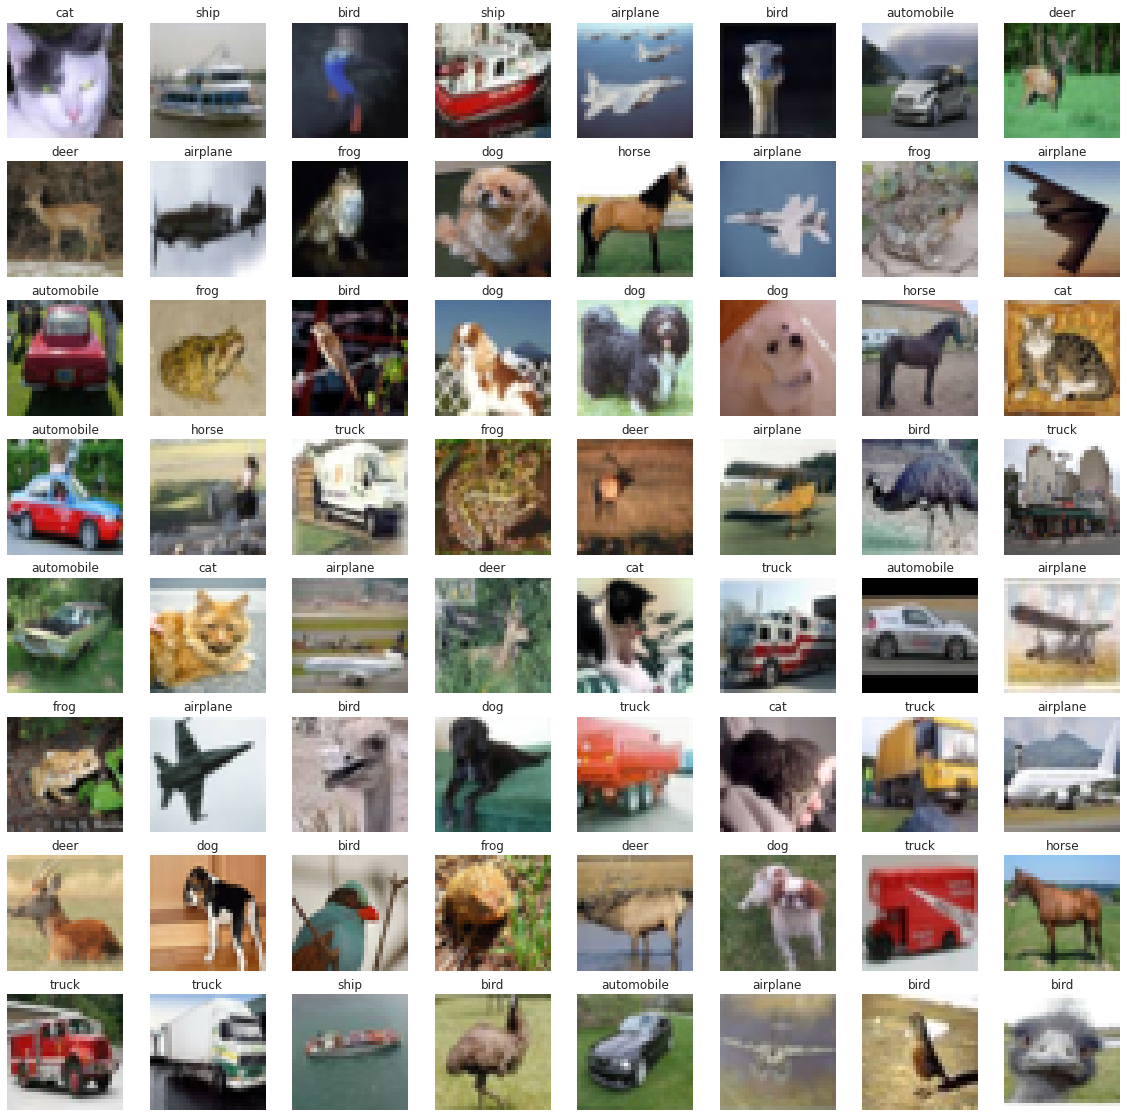

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [ ]:
X_train[5].min()

0

In [ ]:
X_train[5].max()

252

In [ ]:
# Normalize image pixels
#255 cunku bitlerle calisiyoruz oda 2^ = 256 max
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[5].min()

0.0

In [ ]:
X_train[5].max()

0.9882353

In [ ]:
X_train[123]

array([[[0.6745098 , 0.7137255 , 0.8509804 ],
        [0.67058825, 0.7176471 , 0.85490197],
        [0.6745098 , 0.7254902 , 0.8627451 ],
        ...,
        [0.6784314 , 0.72156864, 0.8392157 ],
        [0.68235296, 0.72156864, 0.8392157 ],
        [0.68235296, 0.72156864, 0.8392157 ]],

       [[0.6745098 , 0.7137255 , 0.8509804 ],
        [0.6745098 , 0.7176471 , 0.8509804 ],
        [0.6784314 , 0.7254902 , 0.8509804 ],
        ...,
        [0.6784314 , 0.7254902 , 0.8509804 ],
        [0.6784314 , 0.7254902 , 0.8627451 ],
        [0.6784314 , 0.7254902 , 0.85882354]],

       [[0.67058825, 0.7137255 , 0.84313726],
        [0.6745098 , 0.7176471 , 0.8352941 ],
        [0.6901961 , 0.7254902 , 0.8392157 ],
        ...,
        [0.6862745 , 0.7294118 , 0.84705883],
        [0.6784314 , 0.73333335, 0.87058824],
        [0.6745098 , 0.7254902 , 0.8666667 ]],

       ...,

       [[0.6745098 , 0.7254902 , 0.8509804 ],
        [0.6745098 , 0.7254902 , 0.8509804 ],
        [0.6745098 , 0

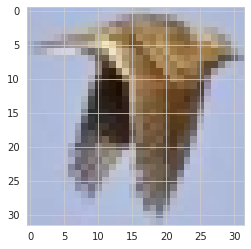

In [ ]:
plt.imshow(X_train[123])

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

#genel olarak filter sayisi artirilarak gidilir
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#max poolingde filtre ve parametre yok

In [ ]:
#layer sonunda kac filtre varsa ona gore katman cikar

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4264 - accuracy: 0.4833 - val_loss: 1.1126 - val_accuracy: 0.6041
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0465 - accuracy: 0.6290 - val_loss: 0.9914 - val_accuracy: 0.6543
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9091 - accuracy: 0.6790 - val_loss: 0.9509 - val_accuracy: 0.6725
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8128 - accuracy: 0.7150 - val_loss: 0.9213 - val_accuracy: 0.6771
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7332 - accuracy: 0.7419 - val_loss: 0.8814 - val_accuracy: 0.6954
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6718 - accuracy: 0.7616 - val_loss: 0.9055 - val_accuracy: 0.6906
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6063 - accuracy: 0.7860 - val_loss: 0.9138 - val_accuracy

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.426,0.483,1.113,0.604
1,1.047,0.629,0.991,0.654
2,0.909,0.679,0.951,0.673
3,0.813,0.715,0.921,0.677
4,0.733,0.742,0.881,0.695


In [ ]:
#burada bir overfit var

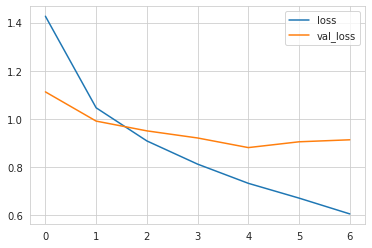

In [ ]:
summary[["loss", "val_loss"]].plot();

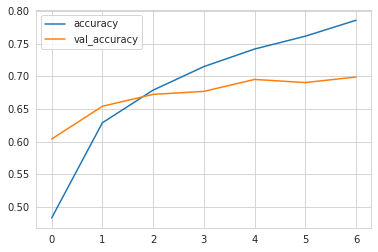

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8814 - accuracy: 0.6954


[0.8814310431480408, 0.6953999996185303]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8814310431480408
Test accuracy: 0.6953999996185303


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.77      0.84      0.81      1000
           2       0.57      0.59      0.58      1000
           3       0.53      0.45      0.48      1000
           4       0.70      0.60      0.65      1000
           5       0.60      0.58      0.59      1000
           6       0.65      0.86      0.74      1000
           7       0.77      0.76      0.76      1000
           8       0.82      0.79      0.81      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[721  44  70  19  12   8  16  11  62  37]
 [ 21 845  11  10   0   5  11   2  29  66]
 [ 58  15 595  43  63  69 108  30  13   6]
 [ 14  20  84 447  67 174 123  39  14  18]
 [ 18   7  90  39 603  45 114  72  10   2]
 [ 13   6  80 171  39 580  54  46   5   6]
 [  5   4  33  48  16  22 856   7   6   3]
 [ 17   7  54  34  47  52  13 760   3  13]
 [ 68  44  20  18   9   7  14   7 788  25]
 [ 36 106  12  20   6   5  15  15  26 759]]


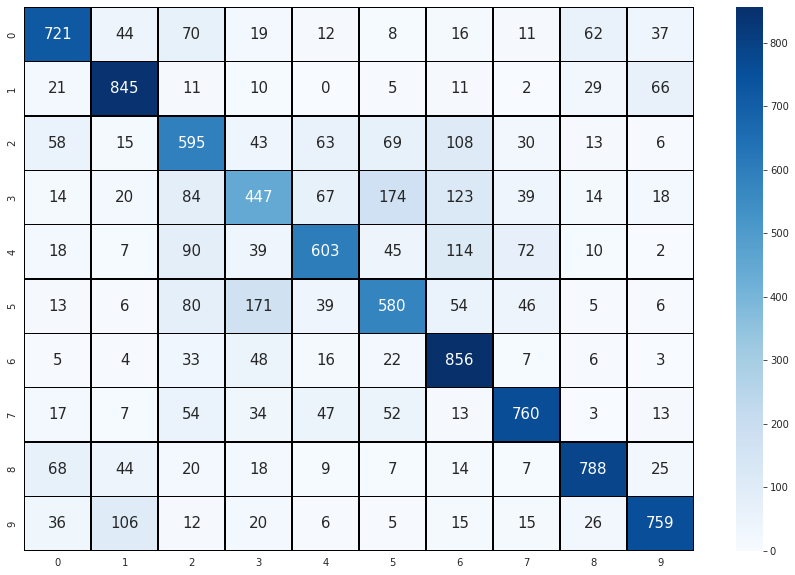

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#2 conv layer +1 pooling sik kullanilir

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4136 - accuracy: 0.4896 - val_loss: 1.0887 - val_accuracy: 0.6285
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0243 - accuracy: 0.6379 - val_loss: 0.9315 - val_accuracy: 0.6716
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8898 - accuracy: 0.6845 - val_loss: 0.8339 - val_accuracy: 0.7088
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8035 - accuracy: 0.7173 - val_loss: 0.7765 - val_accuracy: 0.7332
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7386 - accuracy: 0.7394 - val_loss: 0.7620 - val_accuracy: 0.7393
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6957 - accuracy: 0.7555 - val_loss: 0.7379 - val_accuracy: 0.7458
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6538 - accuracy: 0.7708 - val_loss: 0.7134 - val_ac

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.414,0.490,1.089,0.628
1,1.024,0.638,0.932,0.672
2,0.890,0.685,0.834,0.709
3,0.803,0.717,0.777,0.733
4,0.739,0.739,0.762,0.739


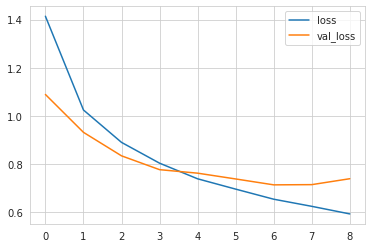

In [ ]:
summary[["loss", "val_loss"]].plot();

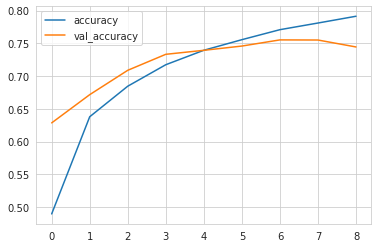

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7134 - accuracy: 0.7552


[0.7134422063827515, 0.7552000284194946]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7134422063827515
Test accuracy: 0.7552000284194946


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1000
           1       0.90      0.85      0.88      1000
           2       0.74      0.58      0.65      1000
           3       0.60      0.47      0.53      1000
           4       0.71      0.71      0.71      1000
           5       0.58      0.77      0.66      1000
           6       0.76      0.85      0.81      1000
           7       0.84      0.80      0.82      1000
           8       0.79      0.90      0.84      1000
           9       0.85      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



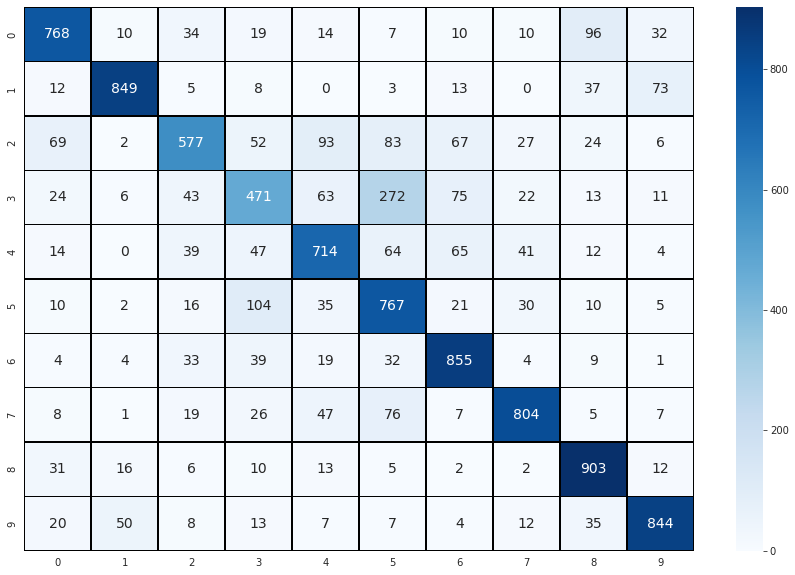

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
#overfittinge mucadele icin CNNde en etkili yontem more dat

# Modelling-3

In [ ]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [ ]:
# gamma ve beta degerleri ile normalization parametrelerini artirdim

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 20s 11ms/step - loss: 1.9660 - accuracy: 0.2938 - val_loss: 1.5484 - val_accuracy: 0.4285
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4703 - accuracy: 0.4692 - val_loss: 1.2754 - val_accuracy: 0.5364
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2498 - accuracy: 0.5665 - val_loss: 1.1085 - val_accuracy: 0.6091
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1166 - accuracy: 0.6165 - val_loss: 0.9144 - val_accuracy: 0.6838
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0106 - accuracy: 0.6591 - val_loss: 0.7901 - val_accuracy: 0.7274
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9318 - accuracy: 0.6912 - val_loss: 0.7455 - val_accuracy: 0.7444
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8763 - accuracy: 0.7135 - val_loss: 0.7789 -

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.966,0.294,1.548,0.428
1,1.470,0.469,1.275,0.536
2,1.250,0.566,1.109,0.609
3,1.117,0.616,0.914,0.684
4,1.011,0.659,0.790,0.727


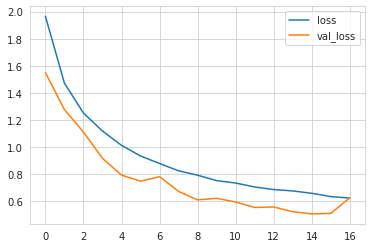

In [ ]:
summary[["loss", "val_loss"]].plot();

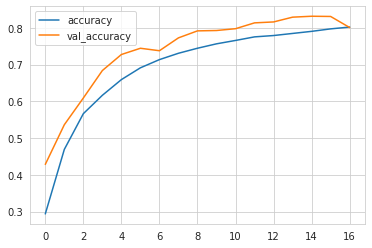

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5032 - accuracy: 0.8315


[0.5032438635826111, 0.8314999938011169]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5032438635826111
Test accuracy: 0.8314999938011169


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.93      0.92      0.92      1000
           2       0.88      0.65      0.74      1000
           3       0.67      0.70      0.68      1000
           4       0.81      0.80      0.81      1000
           5       0.73      0.77      0.75      1000
           6       0.86      0.90      0.88      1000
           7       0.84      0.89      0.87      1000
           8       0.91      0.90      0.91      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [ ]:
#daha iyi sonuc almak icin early stop olmadan dropout kullanmali

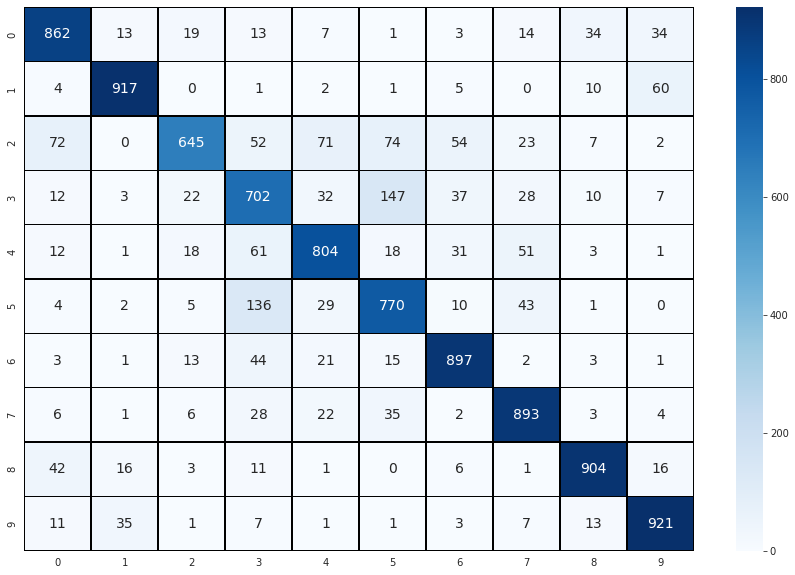

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

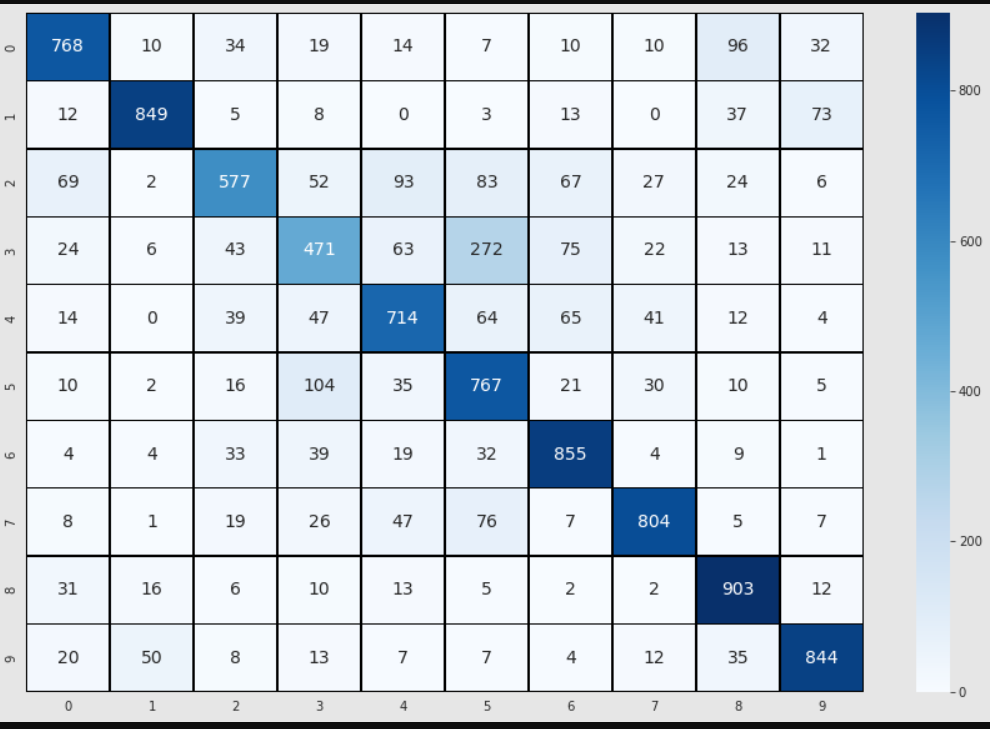

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

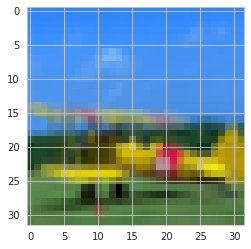

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [ ]:
image_prediction

array([[9.9079424e-01, 3.8437470e-04, 1.1587811e-03, 8.7115332e-05,
        1.1305204e-04, 2.4778172e-05, 8.4933854e-05, 8.1112725e-05,
        4.5322319e-03, 2.7394767e-03]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
model.save("cnn-1.h5")

In [ ]:
#finished

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[15].shape

(32, 32, 3)

In [ ]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

8

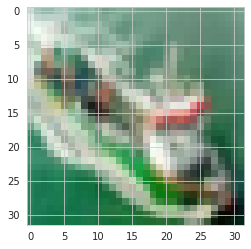

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]

'ship'